<a href="https://colab.research.google.com/github/AniB007/Machine-Learning-Models/blob/main/Decesion%20Trees%20Model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

The file daily_weather.csv is a comma-separated file that contains weather data. The weather station is equipped with sensors that capture weather-related measurements such as air temperature, air pressure, and relative humidity. Data was collected for a period of three years, from September 2011 to September 2014, to ensure that sufficient data for different seasons and weather conditions is captured.

**Problem: Use morning sensor signals as features to predict whether the humidity will be high at 3pm.**

In [ ]:
# Importing Required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
import warnings
warnings.filterwarnings('ignore')
from sklearn.tree import DecisionTreeClassifier,plot_tree
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,confusion_matrix

In [ ]:
# reading data from source
weather = pd.read_csv("/content/drive/MyDrive/daily_weather.csv")

In [ ]:
# First view of dataset
weather

,air_pressure_9am,air_temp_9am,avg_wind_direction_9am,avg_wind_speed_9am,max_wind_direction_9am,max_wind_speed_9am,rain_accumulation_9am,rain_duration_9am,relative_humidity_9am,high_humidity_3pm
0,918.060000,74.822000,271.100000,2.080354,295.400000,2.863283,0.0,0.0,42.420000,1
1,917.347688,71.403843,101.935179,2.443009,140.471549,3.533324,0.0,0.0,24.328697,0
2,923.040000,60.638000,51.000000,17.067852,63.700000,22.100967,0.0,20.0,8.900000,0
3,920.502751,70.138895,198.832133,4.337363,211.203341,5.190045,0.0,0.0,12.189102,0
4,921.160000,44.294000,277.800000,1.856660,136.500000,2.863283,8.9,14730.0,92.410000,1
...,...,...,...,...,...,...,...,...,...,...
1090,918.900000,63.104000,192.900000,3.869906,207.300000,5.212070,0.0,0.0,26.020000,1
1091,918.710000,49.568000,241.600000,1.811921,227.400000,2.371156,0.0,0.0,90.350000,1
1092,916.600000,71.096000,189.300000,3.064608,200.800000,3.892276,0.0,0.0,45.590000,1
1093,912.600000,58.406000,172.700000,3.825167,189.100000,4.764682,0.0,0.0,64.840000,1


In [ ]:
# Checking for any null values in dataset
weather.isnull().sum()

air_pressure_9am          3
air_temp_9am              5
avg_wind_direction_9am    4
avg_wind_speed_9am        3
max_wind_direction_9am    3
max_wind_speed_9am        4
rain_accumulation_9am     6
rain_duration_9am         3
relative_humidity_9am     0
high_humidity_3pm         0
dtype: int64

In [ ]:
# Checking for unique values
weather.nunique()

air_pressure_9am           852
air_temp_9am               980
avg_wind_direction_9am     942
avg_wind_speed_9am         723
max_wind_direction_9am     943
max_wind_speed_9am         738
rain_accumulation_9am       82
rain_duration_9am          142
relative_humidity_9am     1052
high_humidity_3pm            2
dtype: int64

In [ ]:
# Deleting the null values
weather.dropna(axis=0,inplace = True)

In [ ]:
# Final checking the dataset information & null values
weather.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1064 entries, 0 to 1094
Data columns (total 10 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   air_pressure_9am        1064 non-null   float64
 1   air_temp_9am            1064 non-null   float64
 2   avg_wind_direction_9am  1064 non-null   float64
 3   avg_wind_speed_9am      1064 non-null   float64
 4   max_wind_direction_9am  1064 non-null   float64
 5   max_wind_speed_9am      1064 non-null   float64
 6   rain_accumulation_9am   1064 non-null   float64
 7   rain_duration_9am       1064 non-null   float64
 8   relative_humidity_9am   1064 non-null   float64
 9   high_humidity_3pm       1064 non-null   int64  
dtypes: float64(9), int64(1)
memory usage: 91.4 KB


In [ ]:
# Assigning features values to X & Target values to Y
x= weather.iloc[:,:-1]
y = weather[["high_humidity_3pm"]]

In [ ]:
# Dividing the dataset into Train & Test Split
# Checking te shae of data
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.20,random_state= 61)
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(851, 9)
(213, 9)
(851, 1)
(213, 1)


In [ ]:
# Creating Decesion Tree Model
model = DecisionTreeClassifier()
model.fit(x_train,y_train)

DecisionTreeClassifier()

In [ ]:
# Predicting the model
y_pred= model.predict(x_test)

In [ ]:
# Checking the Acuracy
accuracy = accuracy_score(y_test, y_pred)*100
print("The Accuracy is :-", accuracy)

The Accuracy is :- 87.79342723004694


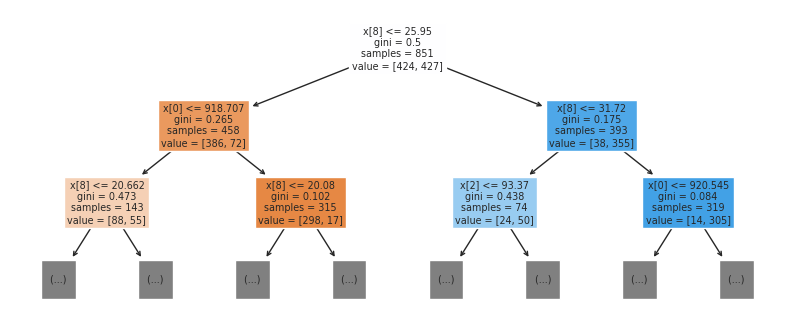

In [ ]:
# Plotting the Tree by Decesion Tree Classifier
# Plotting max depth upto level 2
plt.figure(figsize=(10,4))
plot_tree(model,max_depth = 2,filled = True)
plt.show()

[[101  10]
 [ 16  86]]


[Text(0, 0.5, 'Rain'), Text(0, 1.5, 'No Rain')]

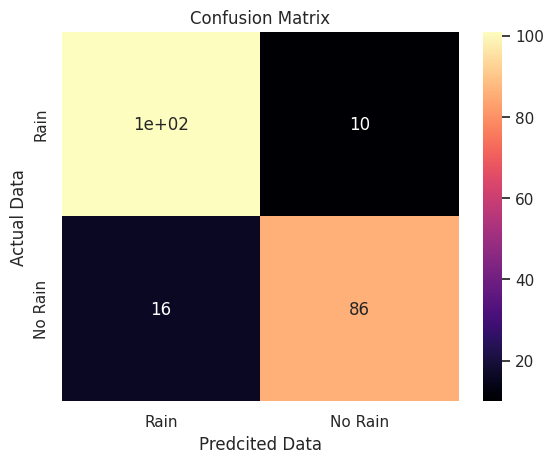

In [ ]:
# Evaluating the model using Confusion Matrix
# Plotting Confusion matrix
cm= confusion_matrix(y_test,y_pred)
labels = ['Rain', 'No Rain']
print(cm)

ax= plt.subplot()
sns.heatmap(cm, annot= True,ax= ax, cmap = "magma")
ax.set_ylabel("Actual Data")
ax.set_xlabel("Predcited Data")
ax.set_title("Confusion Matrix")
ax.xaxis.set_ticklabels(labels)
ax.yaxis.set_ticklabels(labels)

# Conclusion



*   This is a three years dataset of Weather Readings.
*   The model achieved an accuracy of around 87%, meaning it correctly predicted humidity levels for 87.79% of the test dataset.
* The type-1 error False Positive is 10 & type-2 error False Negeative is 16.
* Taking "High Humidity at 3 pm" is as Target varible and rest all column as Features.
* The Criterion is used as "gini", splitter is "best".
* Overall the model prediction is good its not over fitted.